In [1]:
from ground_roll import ground_roll

In [2]:
gr = ground_roll()

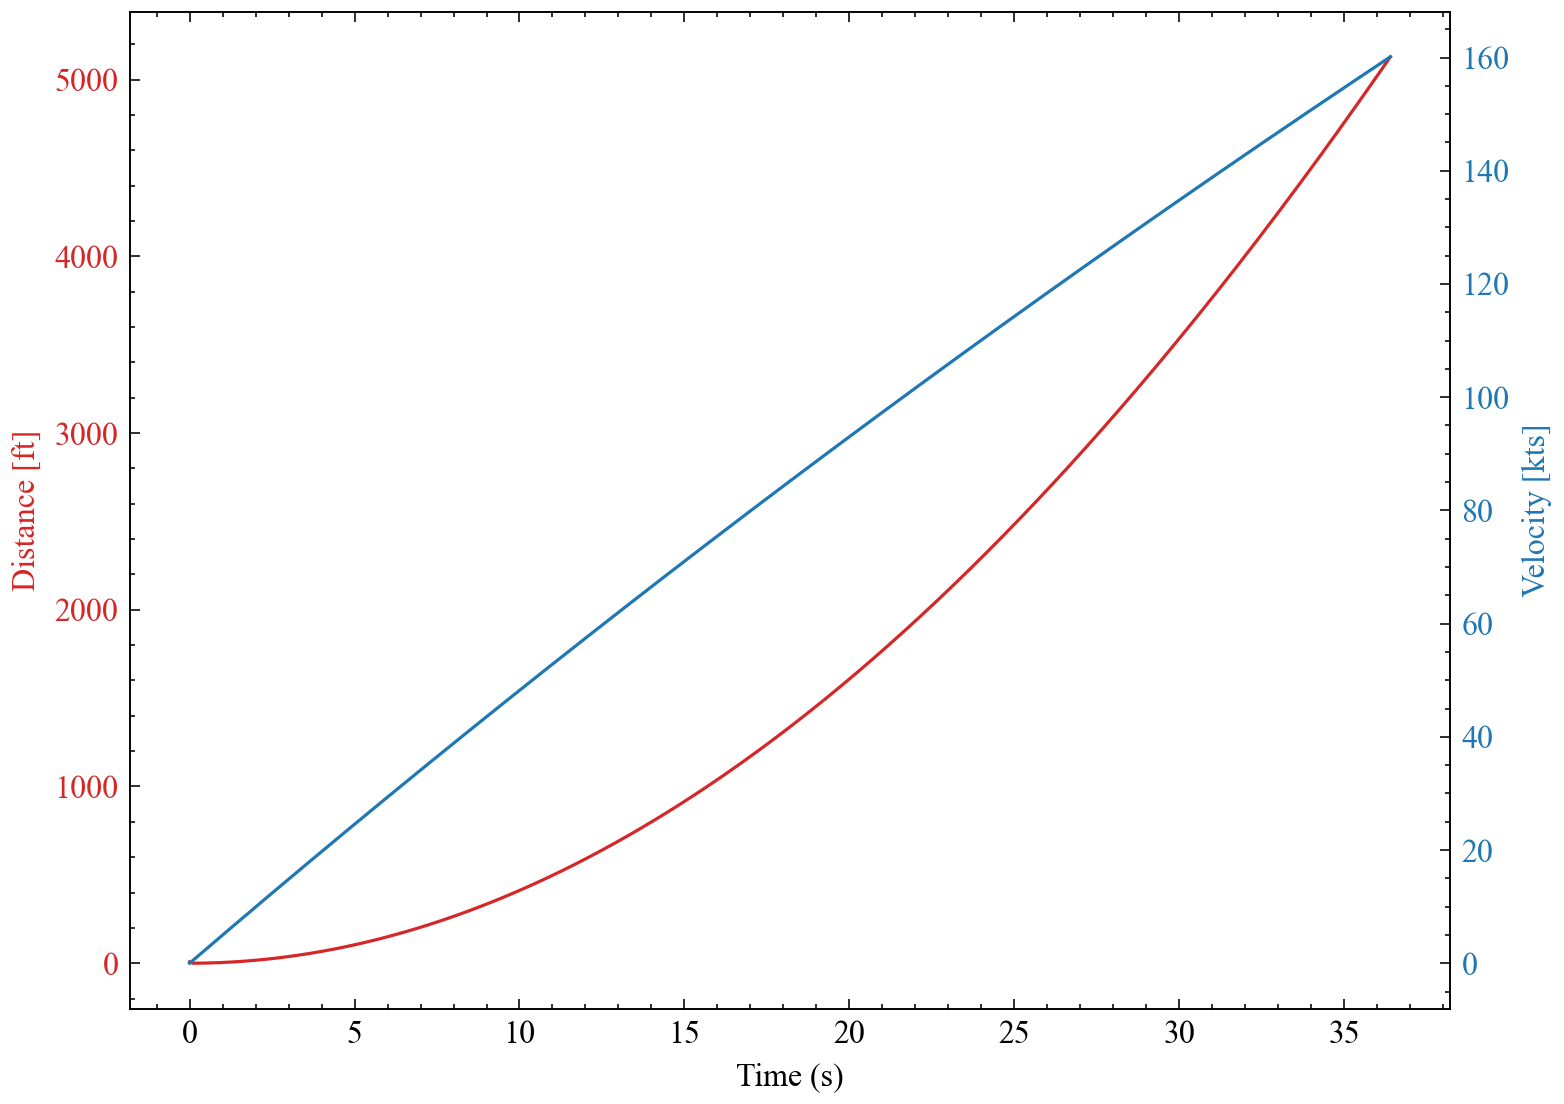

In [3]:
gr.plot_ground_roll()